In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [7]:
data = pd.read_csv('~/Downloads/wiki_movie_plots_deduped.csv', sep=",")
data.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [8]:
data.shape

(34886, 8)

In [9]:
data.dtypes

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
dtype: object

In [10]:
data.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

In [13]:
data_del0_1 = data.dropna(axis = 1 , how = "any")
data.shape,data_del0_1.shape

((34886, 8), (34886, 7))

In [14]:
data_del0_2 = data.dropna(axis = 0 , how = "any")
data.shape,data_del0_2.shape

((34886, 8), (33464, 8))

In [15]:
data_new_3 = data.fillna("Unknown")

In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
num_cols = []   
total_count = data.shape[0]
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Cast. Тип данных object. Количество пустых значений 1422, 4.08%.


In [17]:
cat_temp_data = data[['Cast']]
cat_temp_data['Cast'].unique()


array([nan, 'May Clark', 'William Craven, Florence Lawrence', ...,
       'Ata Demirer, Tuvana Türkay, Ülkü Duru',
       'YouTubers Shanna Malcolm, Shira Lazar, Sara Fletcher and Ashley Clements',
       'Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, Nejat İşler'],
      dtype=object)

In [18]:
cat_temp_data.head()

,Cast
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [19]:
cat_temp_data[cat_temp_data['Cast'].isnull()].shape

(1422, 1)

In [21]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='NA')
data_imp = imp.fit_transform(cat_temp_data)
data_imp

array([['NA'],
       ['NA'],
       ['NA'],
       ...,
       ['Ata Demirer, Tuvana Türkay, Ülkü Duru'],
       ['YouTubers Shanna Malcolm, Shira Lazar, Sara Fletcher and Ashley Clements'],
       ['Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, Nejat İşler']],
      dtype=object)

In [22]:
data_imp[data_imp=='NA'].size

1422

In [23]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
cat_enc = pd.DataFrame({'c1':data_imp.T[0]})
cat_enc

,c1
0,NA
1,NA
2,NA
3,NA
4,NA
...,...
34881,Director: Russell Crowe\r\nCast: Russell Crowe...
34882,"Ahmet Kural, Murat Cemcir"
34883,"Ata Demirer, Tuvana Türkay, Ülkü Duru"
34884,"YouTubers Shanna Malcolm, Shira Lazar, Sara Fl..."


In [24]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])
cat_enc['c1'].unique()

array(['NA', 'May Clark', 'William Craven, Florence Lawrence', ...,
       'Ata Demirer, Tuvana Türkay, Ülkü Duru',
       'YouTubers Shanna Malcolm, Shira Lazar, Sara Fletcher and Ashley Clements',
       'Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, Nejat İşler'],
      dtype=object)

In [25]:
np.unique(cat_enc_le)

array([    0,     1,     2, ..., 32180, 32181, 32182])

In [26]:
le.inverse_transform([0, 1, 2, 3])

array(['"Manamantha"', "'Fatty' Arbuckle / Buster Keaton",
       "'Fatty' Arbuckle, Al St. John", "'Fatty' Arbuckle, Buster Keaton"],
      dtype=object)

In [27]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])
cat_enc.shape

(34886, 1)

In [28]:
cat_enc_ohe

<34886x32183 sparse matrix of type '<class 'numpy.float64'>'
	with 34886 stored elements in Compressed Sparse Row format>

In [29]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,"Cast_""Manamantha""",Cast_'Fatty' Arbuckle / Buster Keaton,"Cast_'Fatty' Arbuckle, Al St. John","Cast_'Fatty' Arbuckle, Buster Keaton",Cast_'Fatty' Arbuckle/Buster Keaton,"Cast_(Korean dubbed) Kim Il, Choi Jeong-ho","Cast_(Korean dubbed) Lee Taemin, Sunny","Cast_(voices of) Judy Garland, Robert Goulet, Red Buttons","Cast_(voices of) Kelsey Grammer, Ian Holm, Paul Scofield, Patrick Stewart, Julia Ormond, Peter Ustinov","Cast_(voices) Jonathan Taylor Thomas, Matthew Broderick, Jeremy Irons, James Earl Jones, Whoopi Goldberg, Moira Kelly, Nathan Lane",...,"Cast_Öner Erkan, Kadir Çermik & Damla Sönmez","Cast_İsmail Hacıoğlu, Erkan Can & Uğur Polat","Cast_Şafak Sezer, Alp Kırşan & Ahmet Mümtaz Taylan","Cast_Şahan Gökbakar, Gülsen Özbakan & Efe Babacan","Cast_Şahan Gökbakar, Zeynep Çamcı & Emirhan Çelik","Cast_Şahin K, Nuri Alço & Coşkun Göğen","Cast_Şerif Sezer, Mark Dacascos & Zeynep Beşerler","Cast_Şevket Emrulla, Nilüfer Açıkalın & İlker İnanoğlu","Cast_Şeyma Uzunlar, Vahide Gördüm & Sevinç Baş",Cast_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

data = pd.read_csv("~/Downloads/SampleSuperstore.csv",sep = ",")
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

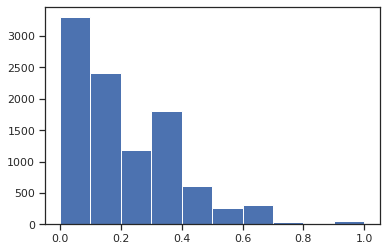

In [74]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Quantity']])
plt.hist(sc1_data)
plt.show()

In [77]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Quantity']])

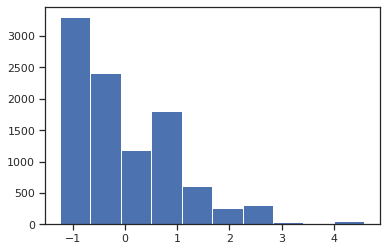

In [78]:
plt.hist(sc2_data)
plt.show()